In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Получаем данные
pass_train=pd.read_csv('data_baseline/train.csv')
pass_test=pd.read_csv('data_baseline/test.csv')

In [3]:
pass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  534 non-null    int64  
 1   Survived     534 non-null    int64  
 2   Pclass       534 non-null    int64  
 3   Name         534 non-null    object 
 4   Sex          534 non-null    object 
 5   Age          432 non-null    float64
 6   SibSp        534 non-null    int64  
 7   Parch        534 non-null    int64  
 8   Ticket       534 non-null    object 
 9   Fare         534 non-null    float64
 10  Cabin        120 non-null    object 
 11  Embarked     534 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 50.2+ KB


In [4]:
# построение гистограмы 
def grouped_bar_chart(labels,set1,set2):
    x = np.arange(len(labels))  # расположение
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, set1, width, label='Dead') # столбец с погибшими
    rects2 = ax.bar(x + width/2, set2, width, label='Survived') # столбец с выжившими

    ax.set_ylabel('Number of people')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

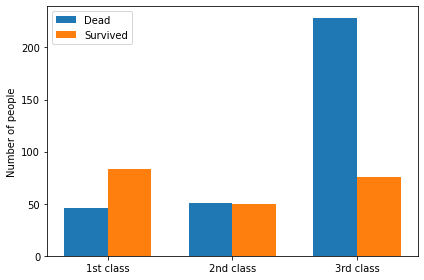

In [5]:
# группировка данных по выжившим и классам
gr=pass_train[['Survived','Pclass','PassengerId']].groupby(['Survived','Pclass']).count()
gr=gr.reset_index()
grouped_bar_chart(['1st class', '2nd class', '3rd class'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

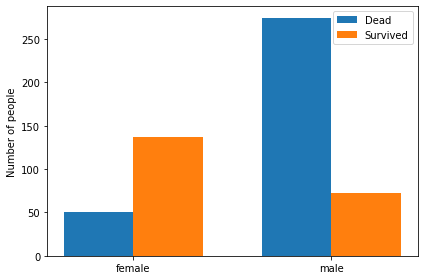

In [6]:
# группировка данных по выживаемости и полу
gr=pass_train[['Survived','Sex','PassengerId']].groupby(['Survived','Sex']).count()
gr=gr.reset_index()
grouped_bar_chart(gr[gr['Survived']==0]['Sex'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [7]:
# группировка данных по выжившим и количеству родственников
gr=pass_train[['Survived','SibSp','PassengerId']].groupby(['Survived','SibSp']).count()
gr

PassengerId
Survived SibSp             
0        0              240
         1               51
         2                7
         3                9
         4                9
         5                3
         8                6
1        0              131
         1               63
         2                9
         3                3
         4                3

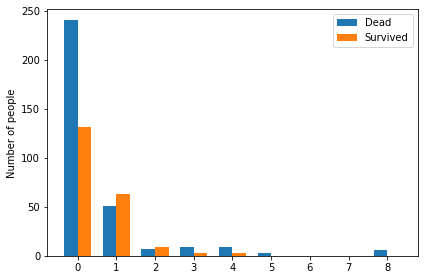

In [8]:
gr=gr.reset_index()
# Количество групп разное для выживших = 0 и выживших = 0
for i in range(0,2):
    for j in range(1,9):
        if len(gr[(gr['Survived']==i)&(gr['SibSp']==j)])==0:
            gr=gr.append({'Survived':i,'SibSp':j,'PassengerId':0},ignore_index=True)
gr=gr.sort_values(by=['Survived','SibSp'])
grouped_bar_chart(gr[gr['Survived']==0]['SibSp'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [9]:
gr=pass_train[['Survived','Parch','PassengerId']].groupby(['Survived','Parch']).count()
gr

PassengerId
Survived Parch             
0        0              267
         1               26
         2               26
         4                2
         5                3
         6                1
1        0              143
         1               39
         2               24
         3                3

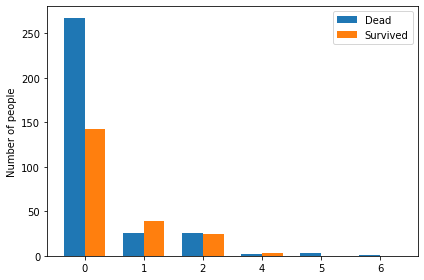

In [10]:
gr=gr.reset_index()
gr=gr.append({'Survived':1,'Parch':4,'PassengerId':0},ignore_index=True)
gr=gr.append({'Survived':1,'Parch':6,'PassengerId':0},ignore_index=True)
gr=gr.sort_values(by=['Survived','Parch'])
grouped_bar_chart(gr[gr['Survived']==0]['Parch'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

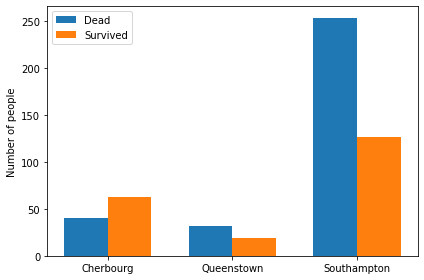

In [11]:
gr=pass_train[['Survived','Embarked','PassengerId']].groupby(['Survived','Embarked']).count()
gr=gr.reset_index()
grouped_bar_chart(['Cherbourg','Queenstown','Southampton'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [12]:
pass_train['Title']=pass_train['Name'].str.extract(r',\s?(.+?)\.\s')
pass_test['Title']=pass_test['Name'].str.extract(r',\s?(.+?)\.\s')

In [13]:
pass_train[['Fare','Survived']].groupby(['Survived']).median()

,Fare
Survived,
0,9.5000
1,25.9292


In [14]:
pass_train[['Fare','Survived']].groupby(['Survived']).mean()

,Fare
Survived,
0,21.339357
1,50.571631


In [15]:
pass_train['Deck']=pass_train['Cabin'].str.slice(0,1)
pass_test['Deck']=pass_test['Cabin'].str.slice(0,1)
pd.concat([pass_train,pass_test])[['Deck','Pclass','PassengerId']].groupby(['Pclass','Deck']).count()


PassengerId
Pclass Deck             
1      A              15
       B              47
       C              59
       D              29
       E              25
       T               1
2      D               4
       E               4
       F               8
3      E               3
       F               5
       G               4

In [16]:
Y_train=pass_train[['Survived']].copy()
params=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','Deck']
X_train=pass_train[params].copy()
X_test=pass_test[params].copy()

# concat X_train and X_test to preprocess them together
X_train['Set']='train'
X_test['Set']='test'
X_full=pd.concat([X_train,X_test])
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 356
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    object 
 8   Deck      204 non-null    object 
 9   Set       891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [17]:
pd.isna(X_full).sum()


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
Deck        687
Set           0
dtype: int64

In [18]:
X_full['Deck'].replace(np.nan,'Z',inplace=True)

In [19]:
# Заменяем пропуски наиболее часто встречаем значением
X_full['Embarked'].replace(np.nan,X_full['Embarked'].value_counts().idxmax(),inplace=True)

In [20]:
# Проверить значения «Пол» в обоих наборах
X_full[['Set','Sex','Pclass']].groupby(['Set','Sex']).count()

Pclass
Set   Sex           
test  female     126
      male       231
train female     188
      male       346

In [21]:
X_full[['Set','Embarked','Pclass']].groupby(['Set','Embarked']).count()

Pclass
Set   Embarked        
test  C             65
      Q             26
      S            266
train C            103
      Q             51
      S            380

In [22]:
X_full[['Set','Title','Pclass']].groupby(['Set','Title']).count().sort_values(by=['Set','Title'])

Pclass
Set   Title               
test  Col                2
      Jonkheer           1
      Major              1
      Master            13
      Miss              63
      Mme                1
      Mr               210
      Mrs               62
      Rev                4
train Capt               1
      Don                1
      Dr                 7
      Lady               1
      Major              1
      Master            27
      Miss             119
      Mlle               2
      Mr               307
      Mrs               63
      Ms                 1
      Rev                2
      Sir                1
      the Countess       1

In [23]:
X_full['Title'].replace(['Capt','Don','Dona','Jonkheer','Lady','Major','Mlle','Mme','Sir','the Countess'],
                        ['Mr','Mr','Mrs','Mr','Mrs','Mr','Miss','Mrs','Mr','Mrs'],inplace=True)

In [24]:
# Check values of 'Deck' in both sets
X_full[['Set','Deck','Pclass']].groupby(['Set','Deck']).count().sort_values(by=['Set','Deck'])

Pclass
Set   Deck        
test  A          7
      B         16
      C         25
      D         13
      E         12
      F          7
      G          4
      Z        273
train A          8
      B         31
      C         34
      D         20
      E         20
      F          6
      T          1
      Z        414

In [25]:
X_full['Deck'].replace('T','Z',inplace=True)

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
le.fit_transform(X_full['Deck'])
X_full['Deck'] = le.fit_transform(X_full['Deck'])
X_full['Sex'] = le.fit_transform(X_full['Sex'])


cat_params=['Embarked','Title']
X_full=pd.get_dummies(data=X_full,columns=cat_params,drop_first=True)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

# array of methods
models=[LogisticRegression(),
        RandomForestClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier()]

X_train=X_full[X_full['Set']=='train'].copy()
X_test=X_full[X_full['Set']=='test'].copy()
X_train.drop(columns=['Set'],inplace=True)
X_test.drop(columns=['Set'],inplace=True)

X_train['Age'].replace(np.nan,X_train['Age'].mean(),inplace=True)
X_train['Fare'].replace(np.nan,X_train['Fare'].mean(),inplace=True)
X_test['Age'].replace(np.nan,X_test['Age'].mean(),inplace=True)
X_test['Fare'].replace(np.nan,X_test['Fare'].mean(),inplace=True)

# scaling
scale=StandardScaler().fit(X_train)
X_train_sc=scale.transform(X_train)
X_test_sc=scale.transform(X_test)

for model in models:
    # обучить модели с кроссвалидацией
    results=cross_validate(model,X_train_sc,Y_train.values.ravel(), cv=10)
    # accuracy
    r2=results['test_score'].mean()
    # print the result
    m=str(model)
    print('r2 for',m[:m.index('(')],'=',r2)

r2 for LogisticRegression = 0.829559748427673
r2 for RandomForestClassifier = 0.7959119496855346
r2 for GaussianNB = 0.7475192173305382
r2 for LinearDiscriminantAnalysis = 0.816282320055905
r2 for KNeighborsClassifier = 0.8052760307477289
r2 for DecisionTreeClassifier = 0.7511530398322852
r2 for GradientBoostingClassifier = 0.8030398322851153


In [29]:
def create_submission_file(y_pred, alg_name):
    extra_test = pass_test.copy()
    extra_test['Survived']=y_pred
    extra_test.set_index('PassengerId',inplace=True)
    extra_test[['Survived']].to_csv(f"{alg_name}_result.csv")

In [30]:
# Logistic Regression

from sklearn.model_selection import GridSearchCV

param_lr={'penalty':['l1','l2'],
         'C' : [0.01,0.1,1,10,50,100,200,300],
         'solver':['liblinear', 'saga']}

gs_lr = GridSearchCV(LogisticRegression(),param_grid = param_lr, scoring="accuracy",n_jobs=-1)
gs_lr.fit(X_train_sc,Y_train.values.ravel())
best_lr = gs_lr.best_estimator_
print(gs_lr.best_params_)
print('score=',gs_lr.best_score_)
Y_pred = gs_lr.predict_proba(X_test_sc)[:, 1]
Y_pred

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
score= 0.8221125022041967


array([0.91119189, 0.10277066, 0.77770794, 0.75633186, 0.10885138,
       0.80640548, 0.12570476, 0.13717969, 0.16134204, 0.02877501,
       0.69289251, 0.12780999, 0.12755342, 0.11451244, 0.06282526,
       0.58308357, 0.20218963, 0.22655738, 0.1249318 , 0.04723796,
       0.09208535, 0.76004588, 0.12982834, 0.22933985, 0.41042959,
       0.11801044, 0.42610665, 0.12041   , 0.56452841, 0.92209225,
       0.10890764, 0.11249313, 0.64833061, 0.61330406, 0.78624169,
       0.37611618, 0.3116153 , 0.83456461, 0.71802244, 0.87828742,
       0.83049382, 0.51620906, 0.48345378, 0.55905351, 0.86207076,
       0.4236792 , 0.19109876, 0.1414784 , 0.10890764, 0.7204211 ,
       0.10885138, 0.09716034, 0.18076813, 0.91282647, 0.17579226,
       0.26771302, 0.0605893 , 0.68113161, 0.11662138, 0.0637754 ,
       0.12750111, 0.34129762, 0.76375032, 0.1258495 , 0.13096074,
       0.06505659, 0.79909032, 0.35387709, 0.31211975, 0.76737082,
       0.1208705 , 0.37617141, 0.86098523, 0.37444144, 0.10466

In [31]:
df_describe = pd.DataFrame(Y_pred)
df_describe.describe()

,0
count,357.000000
mean,0.406936
std,0.310577
min,0.004408
25%,0.123063
50%,0.309498
75%,0.692893
max,0.984987


In [32]:
create_submission_file(Y_pred, 'lr')

In [33]:
lr = LogisticRegression()
lr.fit(X_train_sc,Y_train.values.ravel())
print(lr.get_params())
print('score=',lr.score(X_train_sc, Y_train.values.ravel()))
Y_pred = lr.predict_proba(X_test_sc)[:, 1]
Y_pred

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
score= 0.8370786516853933


array([0.94621462, 0.08852249, 0.78011634, 0.72718306, 0.09555117,
       0.8515533 , 0.11564931, 0.12362276, 0.15297785, 0.00425085,
       0.71496014, 0.11822168, 0.11791069, 0.10220588, 0.0453578 ,
       0.5902038 , 0.19812805, 0.23847915, 0.11471754, 0.03060236,
       0.07649052, 0.79073299, 0.12070105, 0.22343419, 0.45201744,
       0.10098711, 0.42690652, 0.10363683, 0.55242737, 0.94331582,
       0.09561617, 0.09982015, 0.6736148 , 0.6385028 , 0.83787735,
       0.37695226, 0.34297078, 0.878984  , 0.74792432, 0.92169496,
       0.87645694, 0.50298697, 0.44640919, 0.60950732, 0.90703774,
       0.38153711, 0.18222335, 0.12851608, 0.09561617, 0.74851295,
       0.09555117, 0.08215401, 0.17779923, 0.93149744, 0.16468477,
       0.26179215, 0.0437925 , 0.68694563, 0.10471059, 0.04376228,
       0.11784732, 0.34205988, 0.81361365, 0.11582397, 0.12205486,
       0.01287838, 0.85122231, 0.34792765, 0.34365785, 0.79938985,
       0.10979949, 0.37153457, 0.87428051, 0.33709838, 0.09070

In [34]:
create_submission_file(Y_pred, 'lr1')

In [35]:
# Random Forest

param_rf={'max_features': [1, 2, 3, 5, 10],
          'min_samples_split': [2, 3, 5, 7, 10],
          'min_samples_leaf': [1, 3, 5, 7, 10],
          'bootstrap': [False],
          'n_estimators' :[100,200,300]}

gs_rf = GridSearchCV(RandomForestClassifier(),param_grid = param_rf, scoring="accuracy",n_jobs=-1)
gs_rf.fit(X_train_sc,Y_train.values.ravel())
best_rf=gs_rf.best_estimator_
print(best_rf)
print('score=',gs_rf.best_score_)
Y_pred = gs_rf.predict_proba(X_test_sc)[:, 1]

RandomForestClassifier(bootstrap=False, max_features=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200)
score= 0.8333098219008992


In [36]:
create_submission_file(Y_pred, 'rf')

In [37]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_sc, Y_train.values.ravel())
best_gnb = gaussian.score(X_train_sc, Y_train.values.ravel())
Y_pred = gaussian.predict_proba(X_test_sc)[:, 1]
print('score', best_gnb)
Y_pred

score 0.8052434456928839


array([9.99999879e-01, 4.92116103e-04, 9.99724079e-01, 9.96189794e-01,
       5.04393911e-04, 9.99999175e-01, 5.66624810e-04, 1.05415011e-03,
       1.08139091e-03, 0.00000000e+00, 9.63153445e-01, 5.80315451e-04,
       5.82423801e-04, 5.22289297e-04, 5.81444095e-04, 8.29545835e-01,
       1.91567579e-03, 1.39508754e-03, 5.73235792e-04, 4.42587380e-04,
       4.88519265e-04, 9.55995532e-01, 5.96247358e-04, 3.62628273e-03,
       1.45037690e-02, 1.09930428e-03, 1.10024608e-01, 1.39364547e-03,
       9.05018144e-01, 9.99999864e-01, 5.03906639e-04, 5.15143236e-04,
       9.99998286e-01, 9.15296490e-01, 9.99998421e-01, 6.00866235e-01,
       4.70013829e-03, 9.99999303e-01, 9.99998484e-01, 9.99999167e-01,
       9.99999145e-01, 8.32702856e-01, 7.38583618e-01, 9.88165707e-01,
       9.99999240e-01, 1.21317865e-01, 7.18228728e-03, 1.15891606e-03,
       5.03906639e-04, 9.99999097e-01, 5.04393911e-04, 4.88471808e-04,
       1.23214318e-03, 9.99970152e-01, 1.64321416e-03, 5.20636321e-02,
      

In [38]:
create_submission_file(Y_pred, 'gnb')

In [39]:
# Linear Discriminant Analysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_sc, Y_train.values.ravel())
best_lda= clf.score(X_train_sc, Y_train.values.ravel())
print('score=',best_lda)
Y_pred=clf.predict_proba(X_test_sc)[:, 1]
Y_pred

score= 0.8295880149812734


array([9.60864351e-01, 4.68343253e-02, 8.44477008e-01, 4.19760575e-01,
       5.06489015e-02, 8.78635249e-01, 6.15789383e-02, 7.13742148e-02,
       9.54851201e-02, 1.37693647e-02, 7.88407403e-01, 6.30336034e-02,
       6.29180434e-02, 5.42886974e-02, 2.44064584e-02, 6.49209294e-01,
       1.19933830e-01, 1.53465333e-01, 6.12334235e-02, 1.67480102e-02,
       4.03510633e-02, 8.41973189e-01, 6.44672205e-02, 1.50868510e-01,
       3.74638189e-01, 5.99536916e-02, 4.76884378e-01, 5.65374002e-02,
       6.28195455e-01, 9.56818443e-01, 5.06726127e-02, 5.29796333e-02,
       7.00116092e-01, 5.45209524e-01, 8.48707119e-01, 2.57373600e-01,
       2.56426321e-01, 9.05310213e-01, 7.76742680e-01, 9.38225586e-01,
       8.99112042e-01, 5.64674580e-01, 5.19616746e-01, 6.54708109e-01,
       9.24081414e-01, 1.39783291e-01, 1.30299317e-01, 7.94486746e-02,
       5.06726127e-02, 7.99830807e-01, 5.06489015e-02, 4.34223930e-02,
       1.13869558e-01, 9.53108411e-01, 9.85115107e-02, 2.01941469e-01,
      

In [40]:
create_submission_file(Y_pred, 'lda')

In [41]:
# KNN

param_kn={'n_neighbors':[1,2,3,5,7,10,14,15,20,22]}

gs_kn = GridSearchCV(KNeighborsClassifier(),param_grid = param_kn, scoring="accuracy",n_jobs=-1)
gs_kn.fit(X_train_sc,Y_train.values.ravel())
best_kn=gs_kn.best_estimator_
print(best_kn)
print('score=',gs_kn.best_score_)
Y_pred=gs_kn.predict_proba(X_test_sc)[:, 1]
Y_pred

KNeighborsClassifier(n_neighbors=15)
score= 0.814494798095574


array([1.        , 0.06666667, 1.        , 0.4       , 0.06666667,
       0.86666667, 0.06666667, 0.13333333, 0.2       , 0.13333333,
       0.73333333, 0.06666667, 0.06666667, 0.2       , 0.13333333,
       0.26666667, 0.26666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.46666667, 0.06666667, 0.26666667, 0.2       ,
       0.2       , 0.33333333, 0.06666667, 0.73333333, 1.        ,
       0.        , 0.13333333, 0.86666667, 0.53333333, 0.8       ,
       0.26666667, 0.26666667, 0.93333333, 0.8       , 0.86666667,
       0.86666667, 0.46666667, 0.73333333, 0.73333333, 0.86666667,
       0.26666667, 0.2       , 0.13333333, 0.        , 0.93333333,
       0.06666667, 0.06666667, 0.13333333, 1.        , 0.26666667,
       0.2       , 0.2       , 0.8       , 0.2       , 0.13333333,
       0.06666667, 0.2       , 0.8       , 0.06666667, 0.06666667,
       0.06666667, 0.86666667, 0.46666667, 0.26666667, 0.66666667,
       0.06666667, 0.53333333, 1.        , 0.33333333, 0.13333

In [42]:
create_submission_file(Y_pred, 'knn')

# Таким образом, наилучий результат показал рандомный лес
# Результат был загружен в Kaggle, оценен в 0.902